### Configure the environment

Following libraries should be installed in the Python environment to run this notebook

- pandas
- seaborn
- matplotlib
- numpy
- sklearn
- imblearn

### Importing libraries

In [23]:
# Libraries used for visualizing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries used for null value imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

# Libraries used for spliting dataset
from sklearn.model_selection import train_test_split

# Libraries used for resampling (imbalance handling)
from imblearn.over_sampling import SMOTE

# Libraries used for normalization (scaling)
from sklearn.preprocessing import RobustScaler

# Libraries used for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# Libraries used for performance measurement
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
import warnings

warnings.filterwarnings("ignore")

### Importing data

In [3]:
train = pd.read_csv(r'data\dataset.csv')
df = train.copy()

### Data pre-processing

#### Cleaning abnormal data

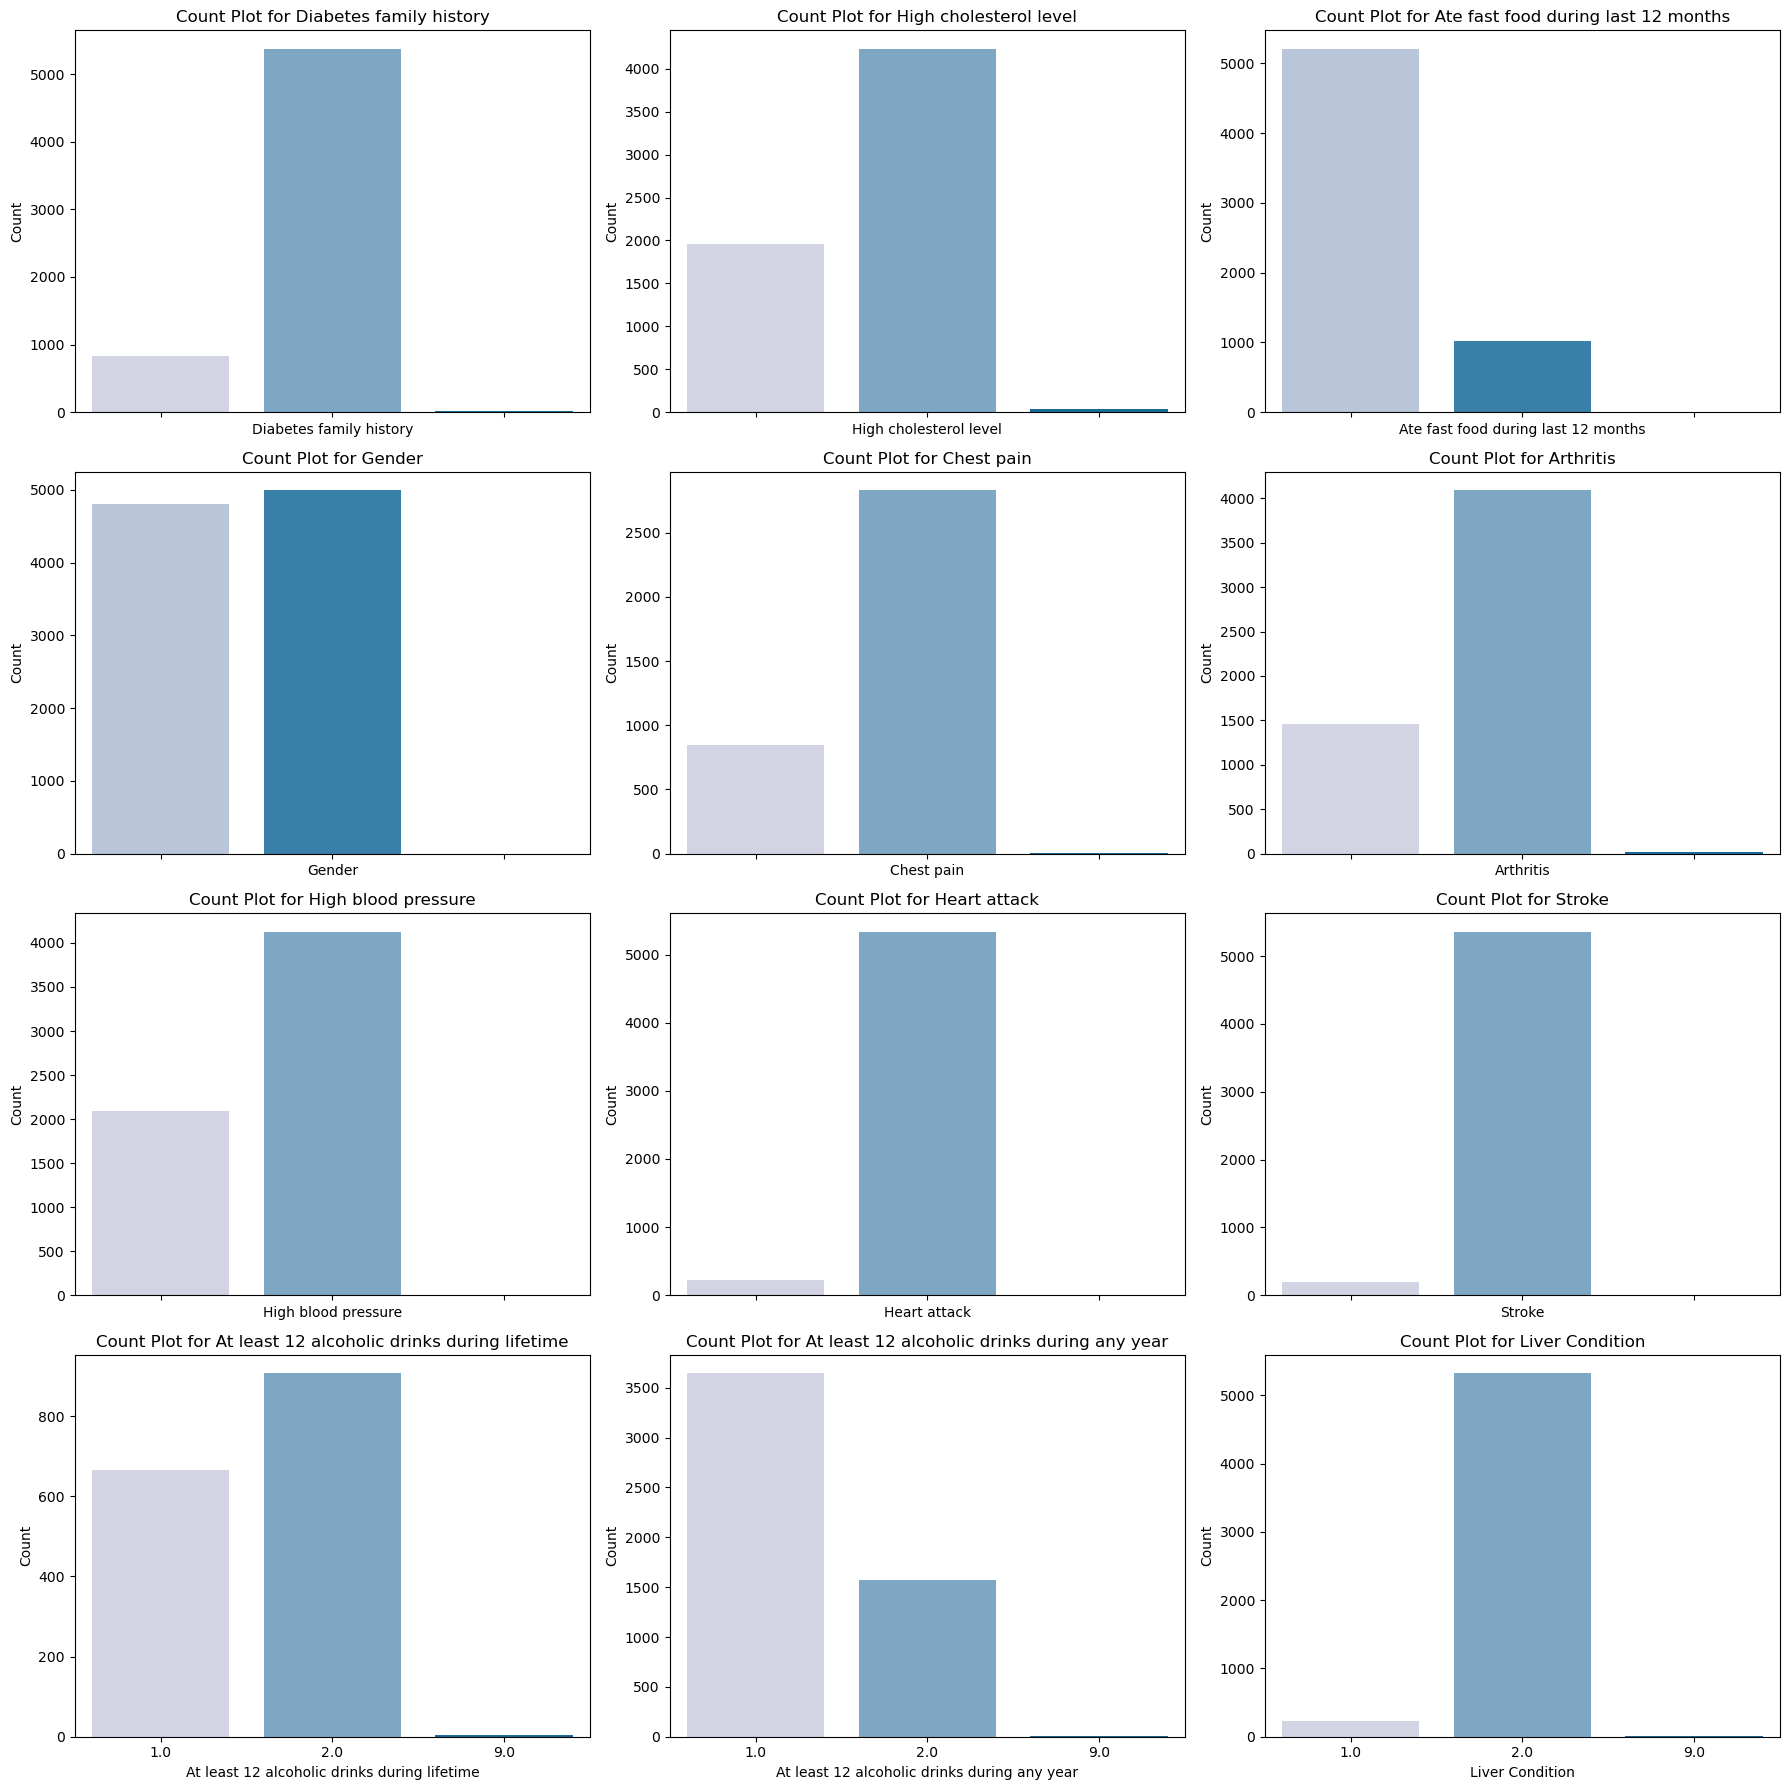

In [4]:
# Checking which columns have abnormal values
# Categorical data columns
categorical_data = [
    "Diabetes family history", 
    "High cholesterol level", 
    "Ate fast food during last 12 months", 
    "Gender", 
    "Chest pain", 
    "Arthritis", 
    "High blood pressure", 
    "Heart attack", 
    "Stroke", 
    "At least 12 alcoholic drinks during lifetime", 
    "At least 12 alcoholic drinks during any year", 
    "Liver Condition"]

# Create subplots
fig, axes = plt.subplots(4, 3, sharex=True, figsize=(18, 18))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over categorical columns and create bar plots
for i, column in enumerate(categorical_data):
    ax = axes[i]
    sns.countplot(x=column, data=df, ax=ax, palette='PuBu')
    ax.set_title(f'Count Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust layout to prevent overlapping titles or labels
plt.tight_layout()

# Show the plots
plt.show()

In [5]:
# Cleaning abnormal values in categorical data
df_clean = df.copy()

df_clean = df_clean[df_clean['Diabetes family history'] != 9]
df_clean = df_clean[df_clean['Chest pain'] != 9]
df_clean = df_clean[df_clean['Arthritis'] != 9]
df_clean = df_clean[df_clean['High blood pressure'] != 9]
df_clean = df_clean[df_clean['Heart attack'] != 9]
df_clean = df_clean[df_clean['Stroke'] != 9]
df_clean = df_clean[df_clean['At least 12 alcoholic drinks during any year'] != 9]
df_clean = df_clean[df_clean['Liver Condition'] != 9]

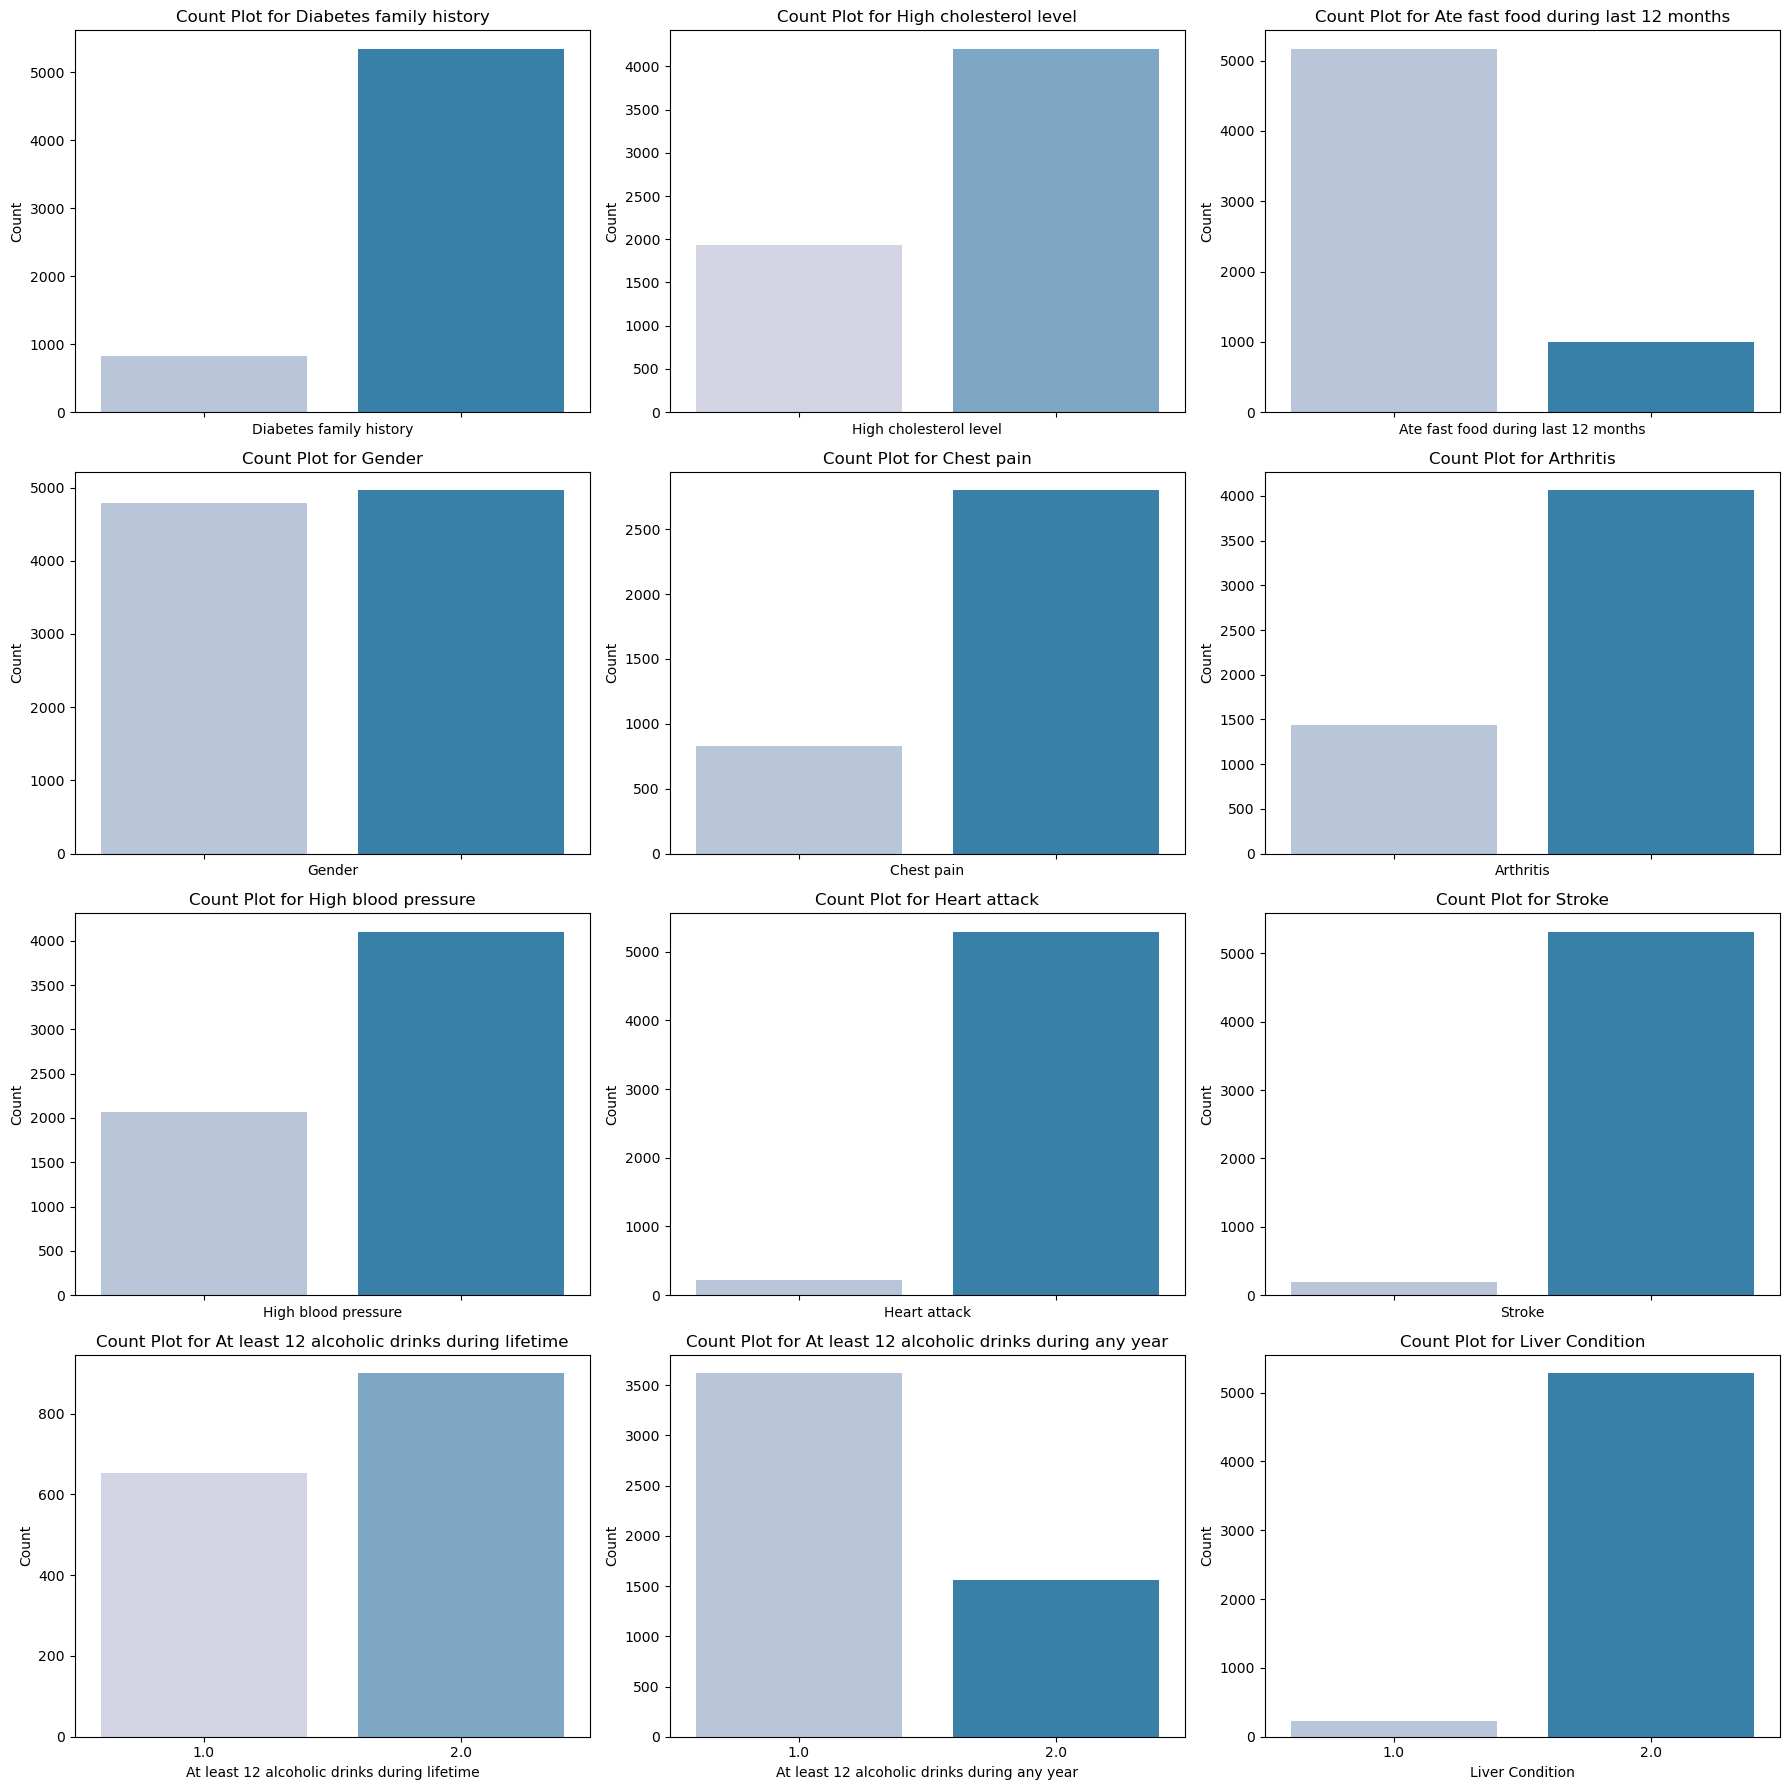

In [6]:
# After cleaning abnormal values in categorical data
# Categorical data columns
categorical_data = [
    "Diabetes family history", 
    "High cholesterol level", 
    "Ate fast food during last 12 months", 
    "Gender", 
    "Chest pain", 
    "Arthritis", 
    "High blood pressure", 
    "Heart attack", 
    "Stroke", 
    "At least 12 alcoholic drinks during lifetime", 
    "At least 12 alcoholic drinks during any year", 
    "Liver Condition"]

# Create subplots
fig, axes = plt.subplots(4, 3, sharex=True, figsize=(18, 18))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over categorical columns and create bar plots
for i, column in enumerate(categorical_data):
    ax = axes[i]
    sns.countplot(x=column, data=df_clean, ax=ax, palette='PuBu')
    ax.set_title(f'Count Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust layout to prevent overlapping titles or labels
plt.tight_layout()

# Show the plots
plt.show()

#### Cleaning outliers

*Note: Since the scope of the project lies within the medical domain, intrepiting the scatter plot results and cleaning outliers needs a considerable amount of domain knowledge or supervision of a domain experts to ensure that the outlier cleaning process doesn't result in a potential data loss of the critical medical data in the dataset. Therefore, due to the lack of sufficient domain knowledge, we decided to clean only the data points which shows extreme amount of deviation from the rest of the data point by observing the scatter plots to avoid the loss of data which can be crusial for the models performance and validity.*

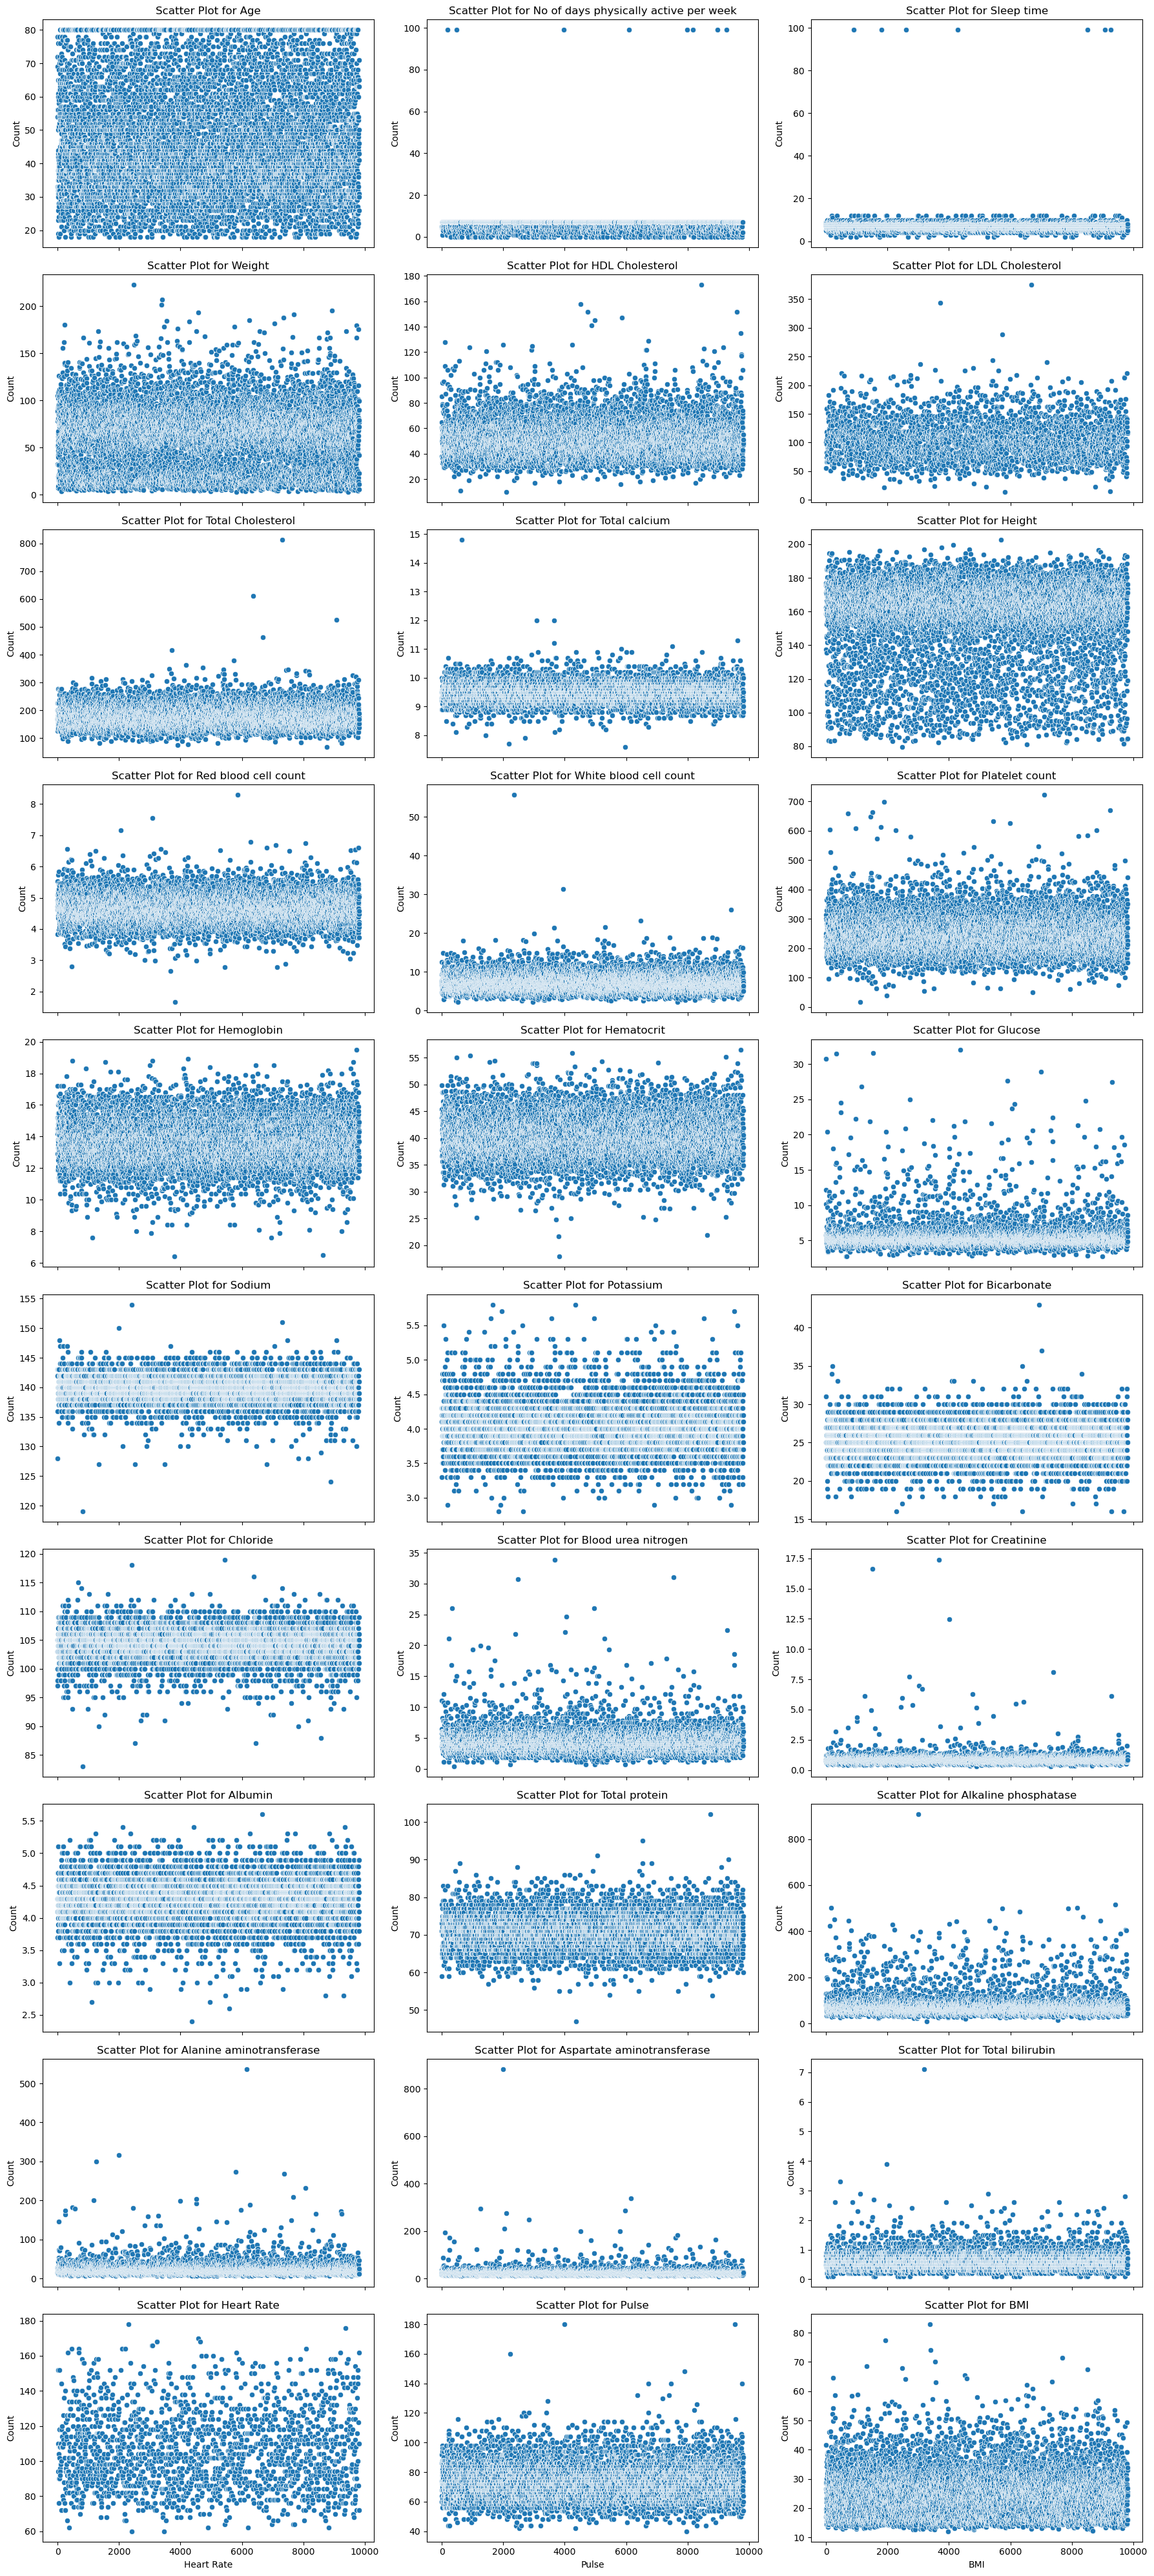

In [7]:
# Checking which columns have abnormal and outliers values
# Numerical data columns
numerical_data = [
    'Age',
    'No of days physically active per week', 
    'Sleep time', 
    'Weight', 
    'HDL Cholesterol', 
    'LDL Cholesterol', 
    'Total Cholesterol', 
    'Total calcium', 
    'Height', 
    'Red blood cell count', 
    'White blood cell count', 
    'Platelet count', 
    'Hemoglobin',
    'Hematocrit',
    'Glucose',
    'Sodium',
    'Potassium',
    'Bicarbonate',
    'Chloride',
    'Blood urea nitrogen',
    'Creatinine',
    'Albumin',
    'Total protein',
    'Alkaline phosphatase',
    'Alanine aminotransferase',
    'Aspartate aminotransferase',
    'Total bilirubin',
    'Heart Rate',
    'Pulse',
    'BMI']

fig, axes = plt.subplots(10, 3, sharex=True, figsize=(18, 40))

axes = axes.flatten()

# Plotting scatter plots to identify abnormal or outlier data points
for i, column in enumerate(numerical_data):
    ax = axes[i]
    sns.scatterplot(x="Id", y=column, data=df, ax=ax, palette='PuBu')
    ax.set_title(f'Scatter Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()

plt.show()

In [8]:
# Cleaning outliers
df_clean = df_clean[(df_clean["No of days physically active per week"].isnull())|(df_clean["No of days physically active per week"] <= 10.0)]
df_clean = df_clean[(df_clean["Sleep time"].isnull())|(df_clean["Sleep time"] <= 15.0)]
df_clean = df_clean[(df_clean["HDL Cholesterol"].isnull())|(df_clean["HDL Cholesterol"] <= 160)]
df_clean = df_clean[(df_clean["LDL Cholesterol"].isnull())|(df_clean["LDL Cholesterol"] <= 300)]
df_clean = df_clean[(df_clean["Total Cholesterol"].isnull())|(df_clean["Total Cholesterol"] <= 500)]
df_clean = df_clean[(df_clean["Total calcium"].isnull())|(df_clean["Total calcium"] <= 13)]
df_clean = df_clean[(df_clean["Red blood cell count"].isnull())|(df_clean["Red blood cell count"] <= 8)]
df_clean = df_clean[(df_clean["Red blood cell count"].isnull())|(df_clean["Red blood cell count"] >= 2)]
df_clean = df_clean[(df_clean["White blood cell count"].isnull())|(df_clean["White blood cell count"] <= 30)]
df_clean = df_clean[(df_clean["Hematocrit"].isnull())|(df_clean["Hematocrit"] >= 20)]
df_clean = df_clean[(df_clean["Sodium"].isnull())|(df_clean["Sodium"] >= 120)]
df_clean = df_clean[(df_clean["Bicarbonate"].isnull())|(df_clean["Bicarbonate"] <= 40)]
df_clean = df_clean[(df_clean["Chloride"].isnull())|(df_clean["Chloride"] >= 85)]
df_clean = df_clean[(df_clean["Blood urea nitrogen"].isnull())|(df_clean["Blood urea nitrogen"] <= 30)]
df_clean = df_clean[(df_clean["Creatinine"].isnull())|(df_clean["Creatinine"] <= 10)]
df_clean = df_clean[(df_clean["Albumin"].isnull())|(df_clean["Albumin"] >= 2.5)]
df_clean = df_clean[(df_clean["Total protein"].isnull())|(df_clean["Total protein"] <= 100)]
df_clean = df_clean[(df_clean["Total protein"].isnull())|(df_clean["Total protein"] >= 50)]
df_clean = df_clean[(df_clean["Alkaline phosphatase"].isnull())|(df_clean["Alkaline phosphatase"] <= 600)]
df_clean = df_clean[(df_clean["Alanine aminotransferase"].isnull())|(df_clean["Alanine aminotransferase"] <= 400)]
df_clean = df_clean[(df_clean["Aspartate aminotransferase"].isnull())|(df_clean["Aspartate aminotransferase"] <= 400)]
df_clean = df_clean[(df_clean["Total bilirubin"].isnull())|(df_clean["Total bilirubin"] <= 5)]
df_clean = df_clean[(df_clean["Pulse"].isnull())|(df_clean["Pulse"] <= 150)]
df_clean = df_clean[(df_clean["BMI"].isnull())|(df_clean["BMI"] <= 80)]

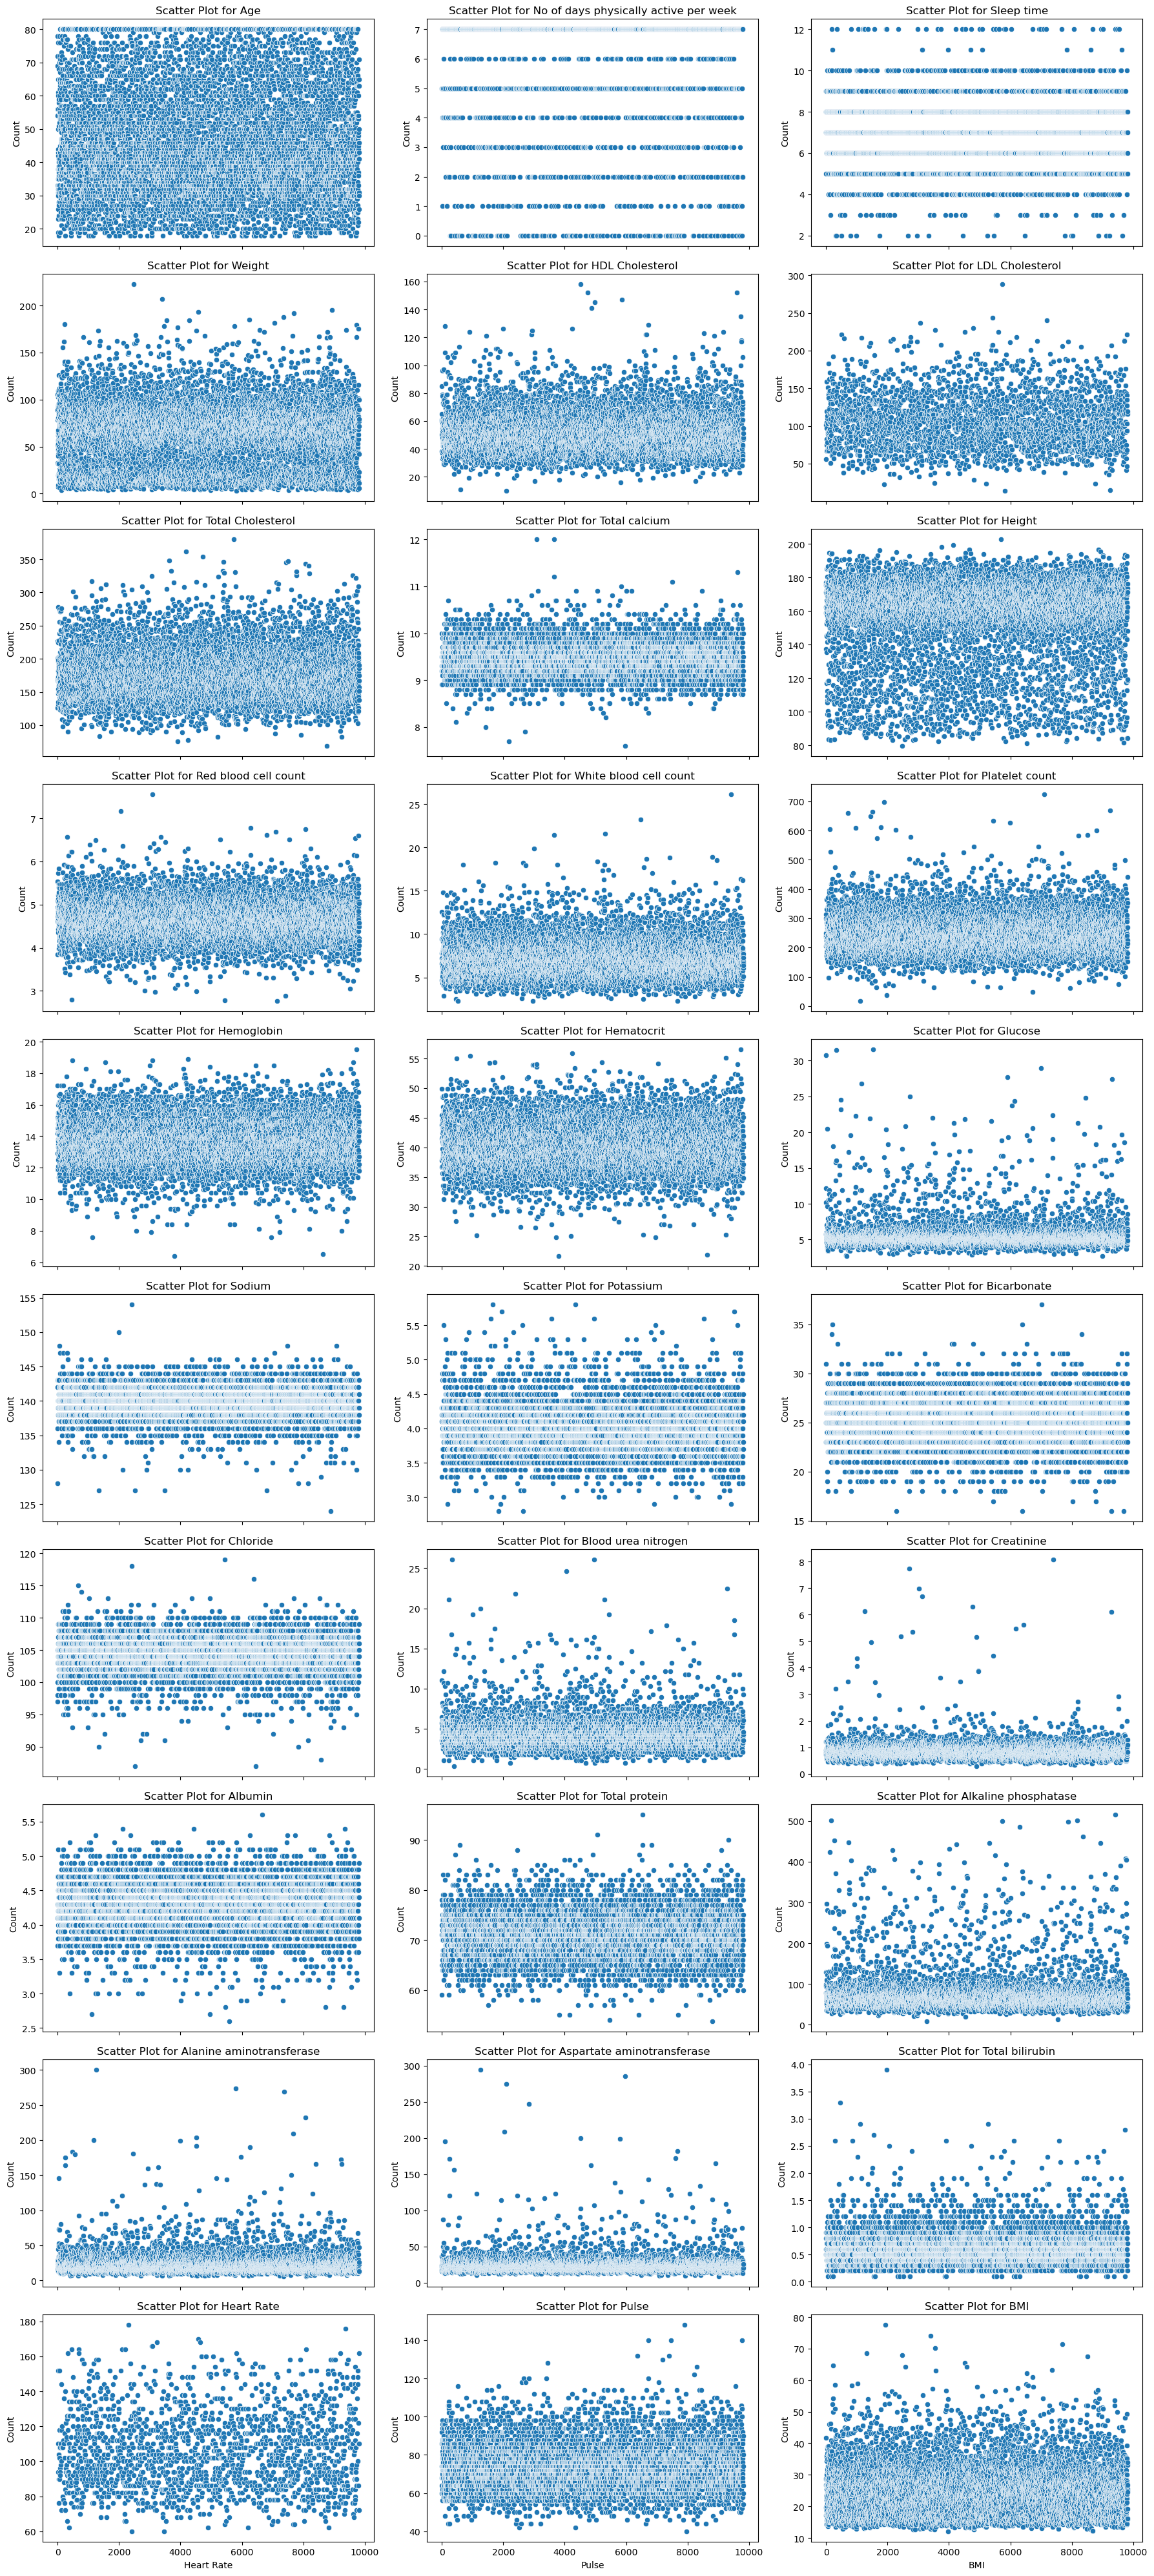

In [9]:
# After cleaning outlers in numerical data
# Numerical data columns
numerical_data = [
    'Age',
    'No of days physically active per week', 
    'Sleep time', 
    'Weight', 
    'HDL Cholesterol', 
    'LDL Cholesterol', 
    'Total Cholesterol', 
    'Total calcium', 
    'Height', 
    'Red blood cell count', 
    'White blood cell count', 
    'Platelet count', 
    'Hemoglobin',
    'Hematocrit',
    'Glucose',
    'Sodium',
    'Potassium',
    'Bicarbonate',
    'Chloride',
    'Blood urea nitrogen',
    'Creatinine',
    'Albumin',
    'Total protein',
    'Alkaline phosphatase',
    'Alanine aminotransferase',
    'Aspartate aminotransferase',
    'Total bilirubin',
    'Heart Rate',
    'Pulse',
    'BMI']

fig, axes = plt.subplots(10, 3, sharex=True, figsize=(18, 40))

axes = axes.flatten()

# Plotting scatter plots to identify abnormal or outlier data points
for i, column in enumerate(numerical_data):
    ax = axes[i]
    sns.scatterplot(x="Id", y=column, data=df_clean, ax=ax, palette='PuBu')
    ax.set_title(f'Scatter Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()

plt.show()

#### Preparing the initial dataset

In [10]:
df_clean = df_clean.drop('Id', axis=1)

*Note: We decided to remove 'BMI' feature from the dataset due to the fact that the dataset already consisit of 'Height' and 'Weight' as features.*

In [11]:
df_clean = df_clean.drop('BMI', axis=1)

#### Cleaning null values

In [12]:
# Checking for null values in the dataset
df_clean.isnull().sum()

Diabetes family history                         3555
Age                                                0
No of days physically active per week           6841
High cholesterol level                          3566
Ate fast food during last 12 months             3566
Sleep time                                      3568
Gender                                             0
Weight                                            90
HDL Cholesterol                                 2169
LDL Cholesterol                                 6641
Total Cholesterol                               2169
Total calcium                                   3273
Height                                           736
Red blood cell count                            1255
White blood cell count                          1255
Platelet count                                  1255
Hemoglobin                                      1255
Hematocrit                                      1255
Glucose                                       

<Axes: >

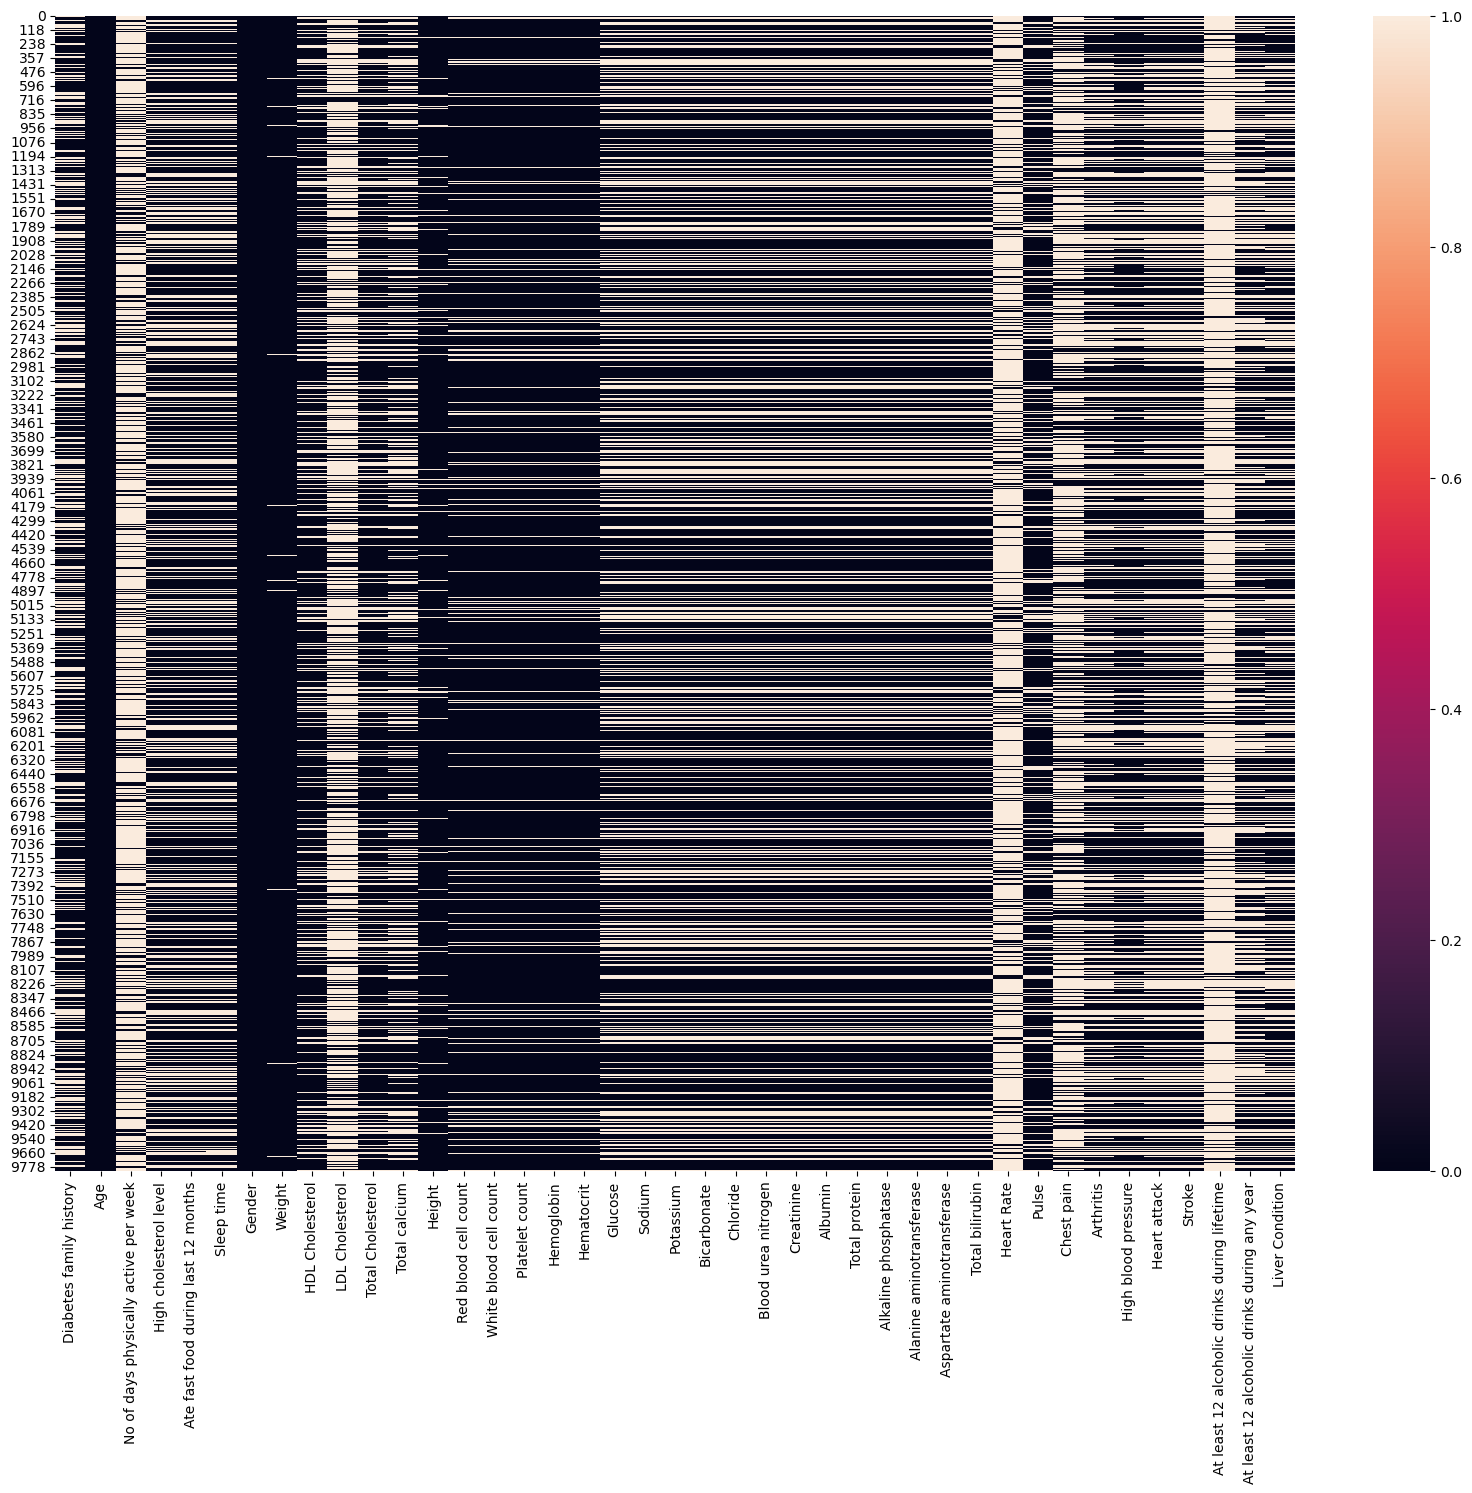

In [13]:
plt.subplots(figsize=(20,15))
sns.heatmap(data=df_clean.isnull())

*Note: Based to the above results, we decided to delete columns where there are very high number of null values compared to the number of training examples.*

In [14]:
# Deleting columns with very large number of null values compared to the size of the dataset
df_clean = df_clean.drop('High cholesterol level', axis=1)
df_clean = df_clean.drop('Heart Rate', axis=1)
df_clean = df_clean.drop('At least 12 alcoholic drinks during lifetime', axis=1)
df_clean = df_clean.drop('No of days physically active per week', axis=1)

*Note: We decide to remove the rows which are having null values in the columns related to the output variables. We reached this decision by considering the fact that we have a considerable amount of training examples and using imputation methods on output variables on the data using to train a supervised learning model can lead to a reduction of the reliability of the model.*

In [15]:
# Deleteing rows with null values in the columns related to the output variables
df_clean = df_clean[pd.notnull(df_clean['Arthritis'])]
df_clean = df_clean[pd.notnull(df_clean['High blood pressure'])]
df_clean = df_clean[pd.notnull(df_clean['Heart attack'])]
df_clean = df_clean[pd.notnull(df_clean['Stroke'])]
df_clean = df_clean[pd.notnull(df_clean['Liver Condition'])]

#### Data imputation

In [16]:
df_imputed = df_clean.copy()

# Mean imputation
df_imputed["Sleep time"].fillna(df_imputed["Sleep time"].mean(), inplace=True)

# Medium imputation
df_imputed["Pulse"].fillna(df_imputed["Pulse"].median(), inplace=True)

# Multiple imputation
imputation_model = DecisionTreeRegressor()

imputer = IterativeImputer(estimator=imputation_model, max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df_imputed.columns)

<Axes: >

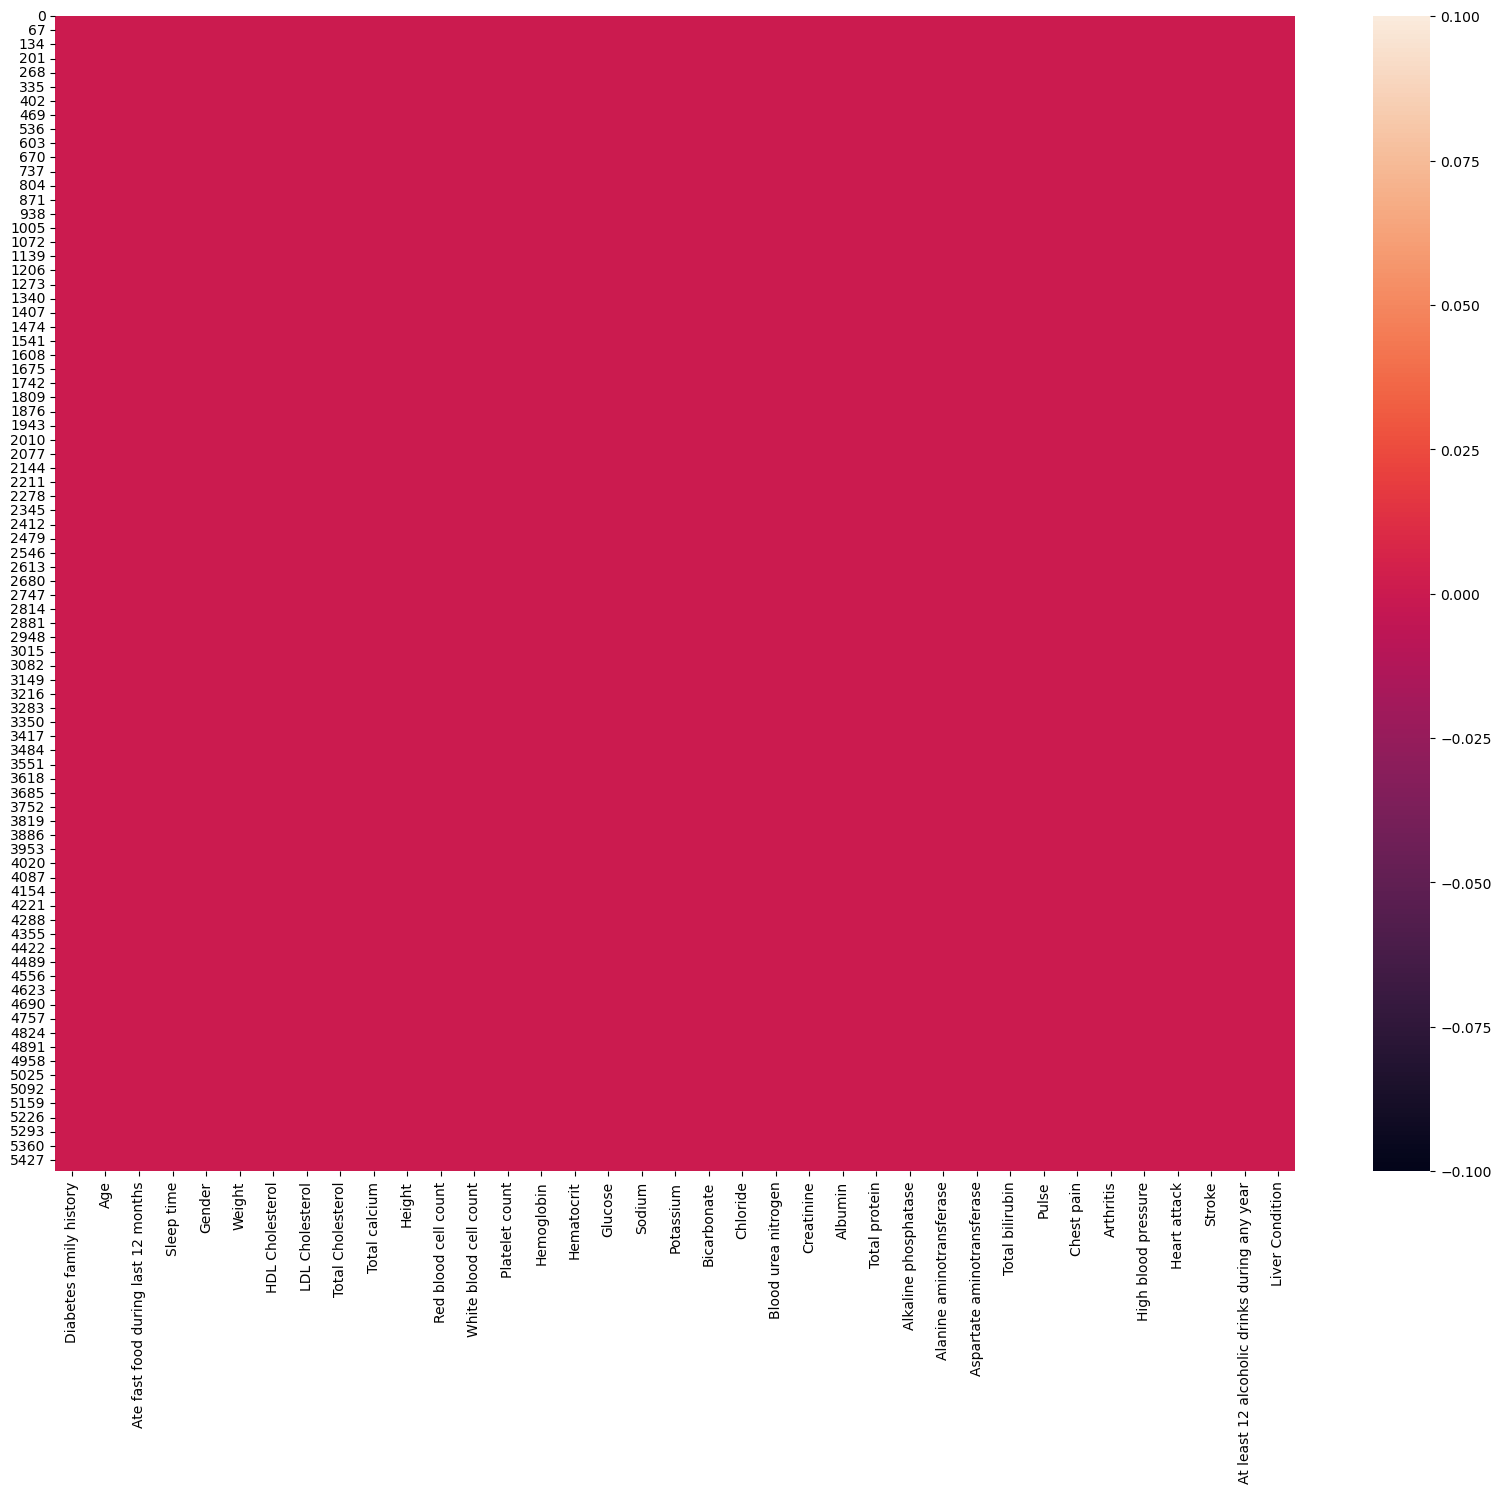

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(data=df_imputed.isnull())

#### Label encoding categorical data

In [18]:
# Apply label encoding for categorical data
df_imputed["Diabetes family history"] = df_imputed["Diabetes family history"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["Ate fast food during last 12 months"] = df_imputed["Ate fast food during last 12 months"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["Gender"] = df_imputed["Gender"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["Chest pain"] = df_imputed["Chest pain"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["Arthritis"] = df_imputed["Arthritis"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["High blood pressure"] = df_imputed["High blood pressure"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["Heart attack"] = df_imputed["Heart attack"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["Stroke"] = df_imputed["Stroke"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["At least 12 alcoholic drinks during any year"] = df_imputed["At least 12 alcoholic drinks during any year"].replace({1.0: 0, 2.0: 1}).astype(int)
df_imputed["Liver Condition"] = df_imputed["Liver Condition"].replace({1.0: 0, 2.0: 1}).astype(int)

### Preparing datasets

*Note: We have decided to use three segments of the dataset for training, validating and testing.*

In [20]:
df_input = df_imputed.copy()

# Dropping the output feature
df_input = df_input.drop('High blood pressure', axis=1)

# Input dataset
X_input = df_input.copy()

# Output dataset for High blood pressure
Y_output_hbp = df_imputed['High blood pressure']

In [21]:
# Spliting dataset as training and validating set
X_train_hbp, X_valid_hbp, y_train_hbp, y_valid_hbp = train_test_split(X_input, Y_output_hbp, test_size=0.4, random_state=42, stratify=Y_output_hbp)

# Spliting validating dataset as dev and test set
X_dev_hbp, X_test_hbp, y_dev_hbp, y_test_hbp = train_test_split(X_valid_hbp, y_valid_hbp, test_size=0.5, random_state=42, stratify=y_valid_hbp)

#### Imbalance handling

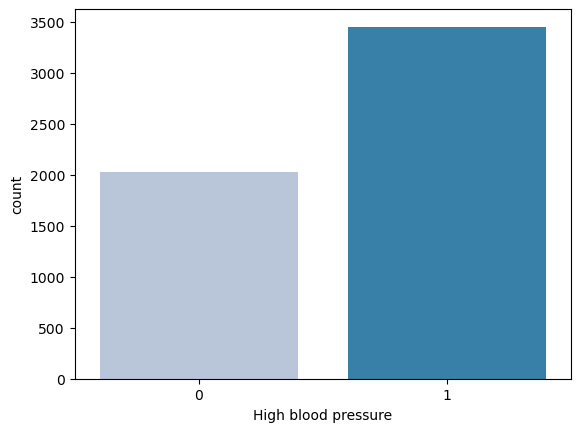

In [22]:
# Initial imbalance data
sns.countplot(x='High blood pressure', data=df_imputed, palette='PuBu')
plt.show()

*Note: We have decided to apply resampling by considering the fact that the dataset is imbalance.*

In [24]:
# Applying SMOTE to the training data of the High blood pressure predicting model
smote = SMOTE(random_state=42)

X_train_hbp_resampled, y_train_hbp_resampled = smote.fit_resample(X_train_hbp, y_train_hbp)

*Note: We have decided to use SMOTE as resampling technique. Furthermore, we have decided to use oversampling techniques to reduce the dataloss where using undersampling techniques can result in loosing valuable data espesially in the medical domain.*

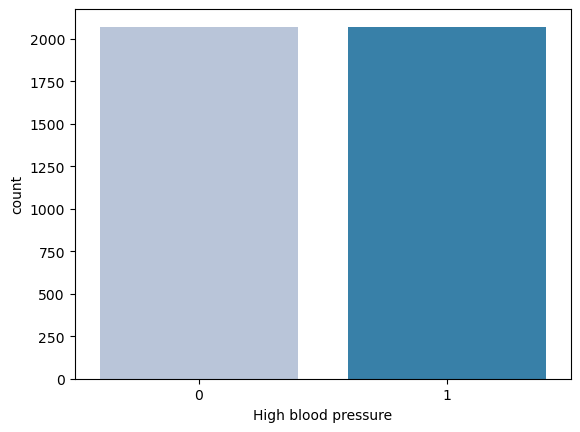

In [25]:
# After resampling
sns.countplot(x=y_train_hbp_resampled, palette='PuBu')
plt.show()

#### Normalization

In [26]:
# Applying normalization (scaling)
scaler = RobustScaler()

X_train_hbp_scaled = scaler.fit_transform(X_train_hbp_resampled)
X_dev_hbp_scaled = scaler.transform(X_dev_hbp)
X_test_hbp_scaled = scaler.transform(X_test_hbp)

#### Feature selection

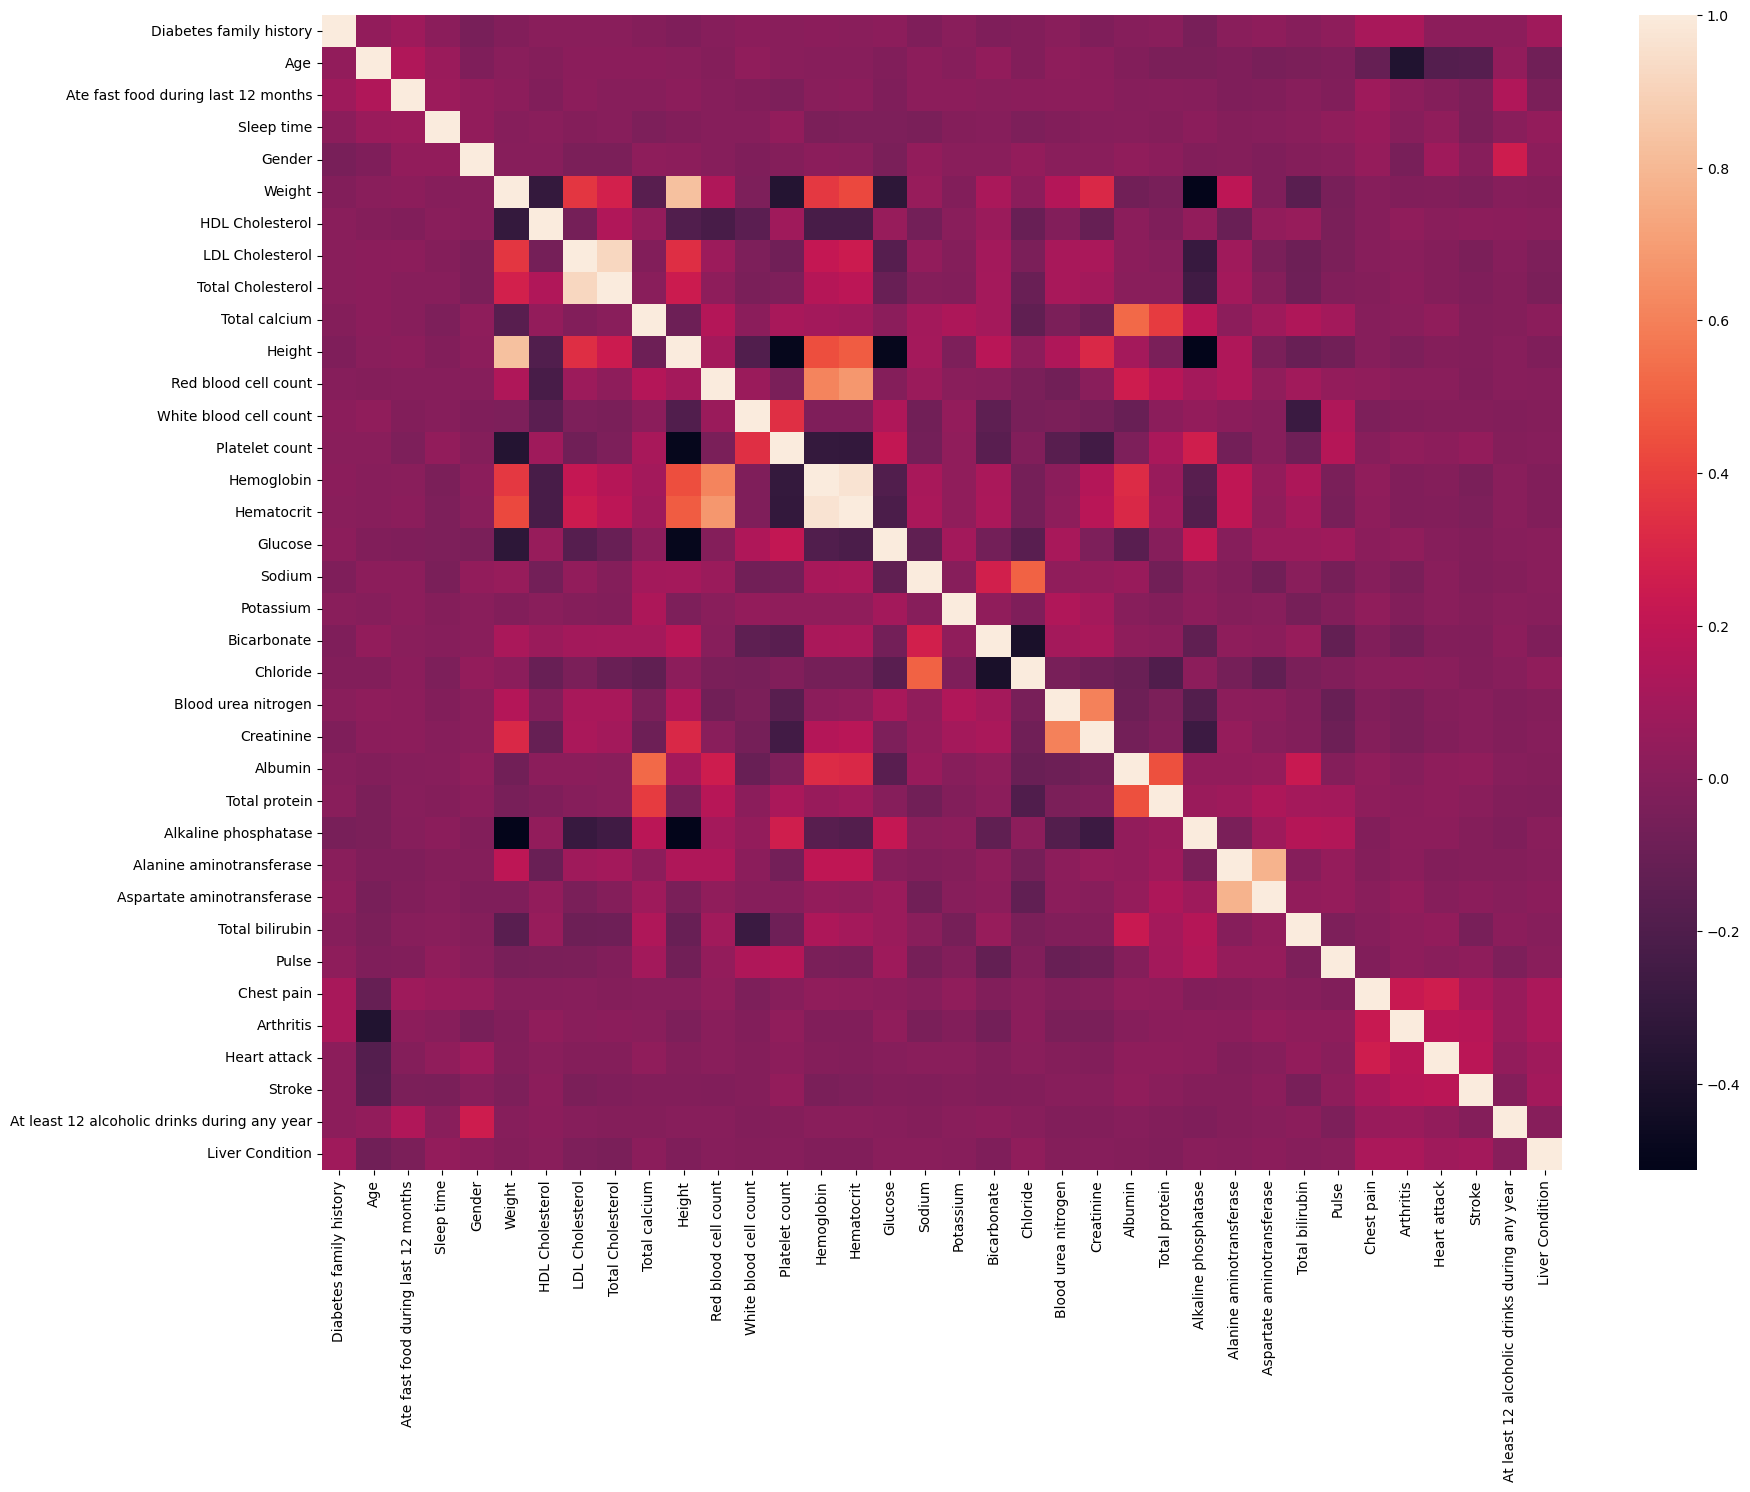

In [27]:
# Plotting the co-relation matrix
plt.figure(figsize=(20,15))
sns.heatmap(X_train_hbp_resampled.corr())
plt.show()

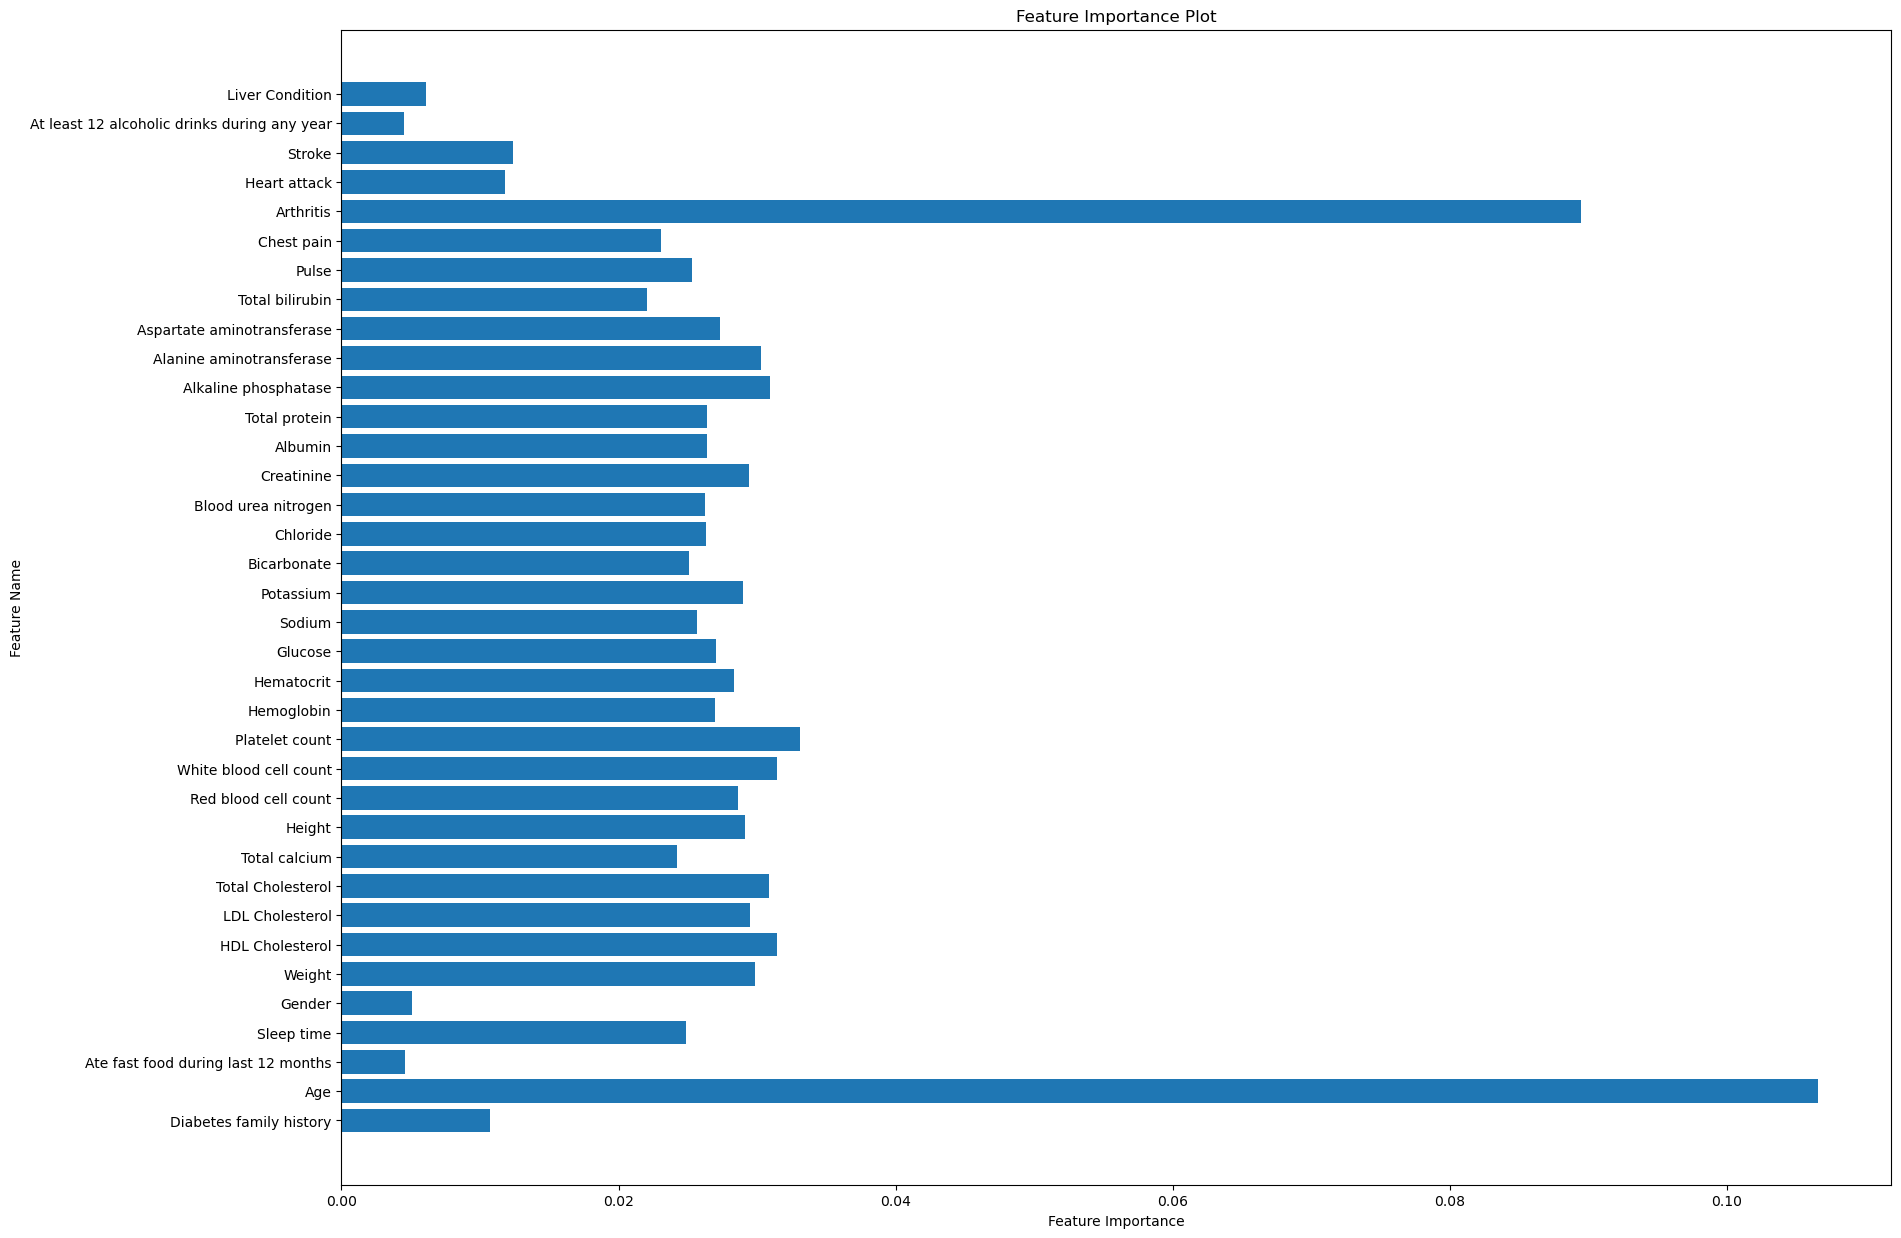

In [28]:
# Feature selection using random forest importance method
clf_hbp_rfi = RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced")
clf_hbp_rfi.fit(X_train_hbp_scaled, y_train_hbp_resampled)

feature_importances = clf_hbp_rfi.feature_importances_

# Plotting feature importance
feature_names = X_train_hbp_resampled.columns
plt.figure(figsize=(20,15))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Plot')
plt.show()

In [53]:
# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# We have chosen 31 as the number of features based on testing
# Select the top 31 features
num_features = 31
top_indices = indices[:num_features]

# Extracting important features
X_train_fs = X_train_hbp_resampled[X_train_hbp_resampled.columns[top_indices]]
X_dev_fs = X_dev_hbp[X_train_hbp_resampled.columns[top_indices]]
X_test_fs = X_test_hbp[X_train_hbp_resampled.columns[top_indices]]

In [54]:
# Scaling the new train and test set
X_train_hbp_scaled_fs = scaler.fit_transform(X_train_fs)
X_dev_hbp_scaled_fs = scaler.transform(X_dev_fs)
X_test_hbp_scaled_fs = scaler.transform(X_test_fs)

In [55]:
# Feature selection cross validation
clf_hbp_cv = LinearSVC(penalty='l1', dual=False, random_state=42, class_weight="balanced")

clf_hbp_cv.fit(X_train_hbp_scaled_fs, y_train_hbp_resampled)

y_pred_hbp_ssvm = clf_hbp_cv.predict(X_dev_hbp_scaled_fs)

accuracy_hbp_cv = accuracy_score(y_dev_hbp, y_pred_hbp_ssvm)
classification_report_result_hbp_cv = classification_report(y_dev_hbp, y_pred_hbp_ssvm)

print("Accuracy:", accuracy_hbp_cv)
print("Classification Report:\n", classification_report_result_hbp_cv)

Accuracy: 0.7034671532846716
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.62      0.61       405
           1       0.77      0.75      0.76       691

    accuracy                           0.70      1096
   macro avg       0.68      0.69      0.68      1096
weighted avg       0.71      0.70      0.70      1096



#### Model selection

In [56]:
# Model selection cross validation
model_svm = svm.SVC(kernel='rbf', C=1.0, random_state=42, class_weight='balanced')
model_rf = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
model_ssvm = LinearSVC(penalty='l1', dual=False, C=1.0, random_state=42, class_weight='balanced')

model_svm.fit(X_train_hbp_scaled_fs, y_train_hbp_resampled)
model_rf.fit(X_train_hbp_scaled_fs, y_train_hbp_resampled)
model_ssvm.fit(X_train_hbp_scaled_fs, y_train_hbp_resampled)

y_pred_model_svm = model_svm.predict(X_dev_hbp_scaled_fs)
y_pred_model_rf = model_rf.predict(X_dev_hbp_scaled_fs)
y_pred_model_ssvm = model_ssvm.predict(X_dev_hbp_scaled_fs)

accuracy_model_svm = accuracy_score(y_dev_hbp, y_pred_model_svm)
accuracy_model_rf = accuracy_score(y_dev_hbp, y_pred_model_rf)
accuracy_model_ssvm = accuracy_score(y_dev_hbp, y_pred_model_ssvm)

classification_report_model_svm = classification_report(y_dev_hbp, y_pred_model_svm)
classification_report_model_rf = classification_report(y_dev_hbp, y_pred_model_rf)
classification_report_model_ssvm = classification_report(y_dev_hbp, y_pred_model_ssvm)

print("Accuracy of the model using SVM:", accuracy_model_svm)
print("Accuracy of the model using Random Forest:", accuracy_model_rf)
print("Accuracy of the model using Soft Margin SVM:", accuracy_model_ssvm)

print('='*60)
print("Classification Report for the model using SVM:\n", classification_report_model_svm)
print('='*60)
print("Classification Report for the model using Random Forest:\n", classification_report_model_rf)
print('='*60)
print("Classification Report for the model using Soft Margin SVM:\n", classification_report_model_ssvm)

Accuracy of the model using SVM: 0.6797445255474452
Accuracy of the model using Random Forest: 0.7071167883211679
Accuracy of the model using Soft Margin SVM: 0.7034671532846716
Classification Report for the model using SVM:
               precision    recall  f1-score   support

           0       0.57      0.54      0.56       405
           1       0.74      0.76      0.75       691

    accuracy                           0.68      1096
   macro avg       0.65      0.65      0.65      1096
weighted avg       0.68      0.68      0.68      1096

Classification Report for the model using Random Forest:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58       405
           1       0.75      0.79      0.77       691

    accuracy                           0.71      1096
   macro avg       0.68      0.68      0.68      1096
weighted avg       0.70      0.71      0.70      1096

Classification Report for the model using Soft Margin SVM:
   

*Note: According to the above results Linear SVC and Random Forest Clasifier has the best performance in the cross validation results. Although the accurancy of the Random Forest clasifier model is 1% higher than the Linear SVC model, we decided to choose Linear SVC model since it has a higher F1 score for predicting the positive class which is considerably influential since the problem relates to the medical domain.*

#### Hyperparameter tuning

In [60]:
# Performing hyperparameter tuning
# Model with default hyperpaameter values
model = LinearSVC(random_state=42, class_weight= 'balanced')

# Parameter grid
param_grid = {'penalty': ['l1', 'l2'], 'loss': ['hinge', 'squared_hinge'], 'C': [0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

# Using grid search with K fold cross validation with k = 5
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train_hbp_scaled_fs, y_train_hbp_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
best_model_score = grid_search.best_estimator_.score(X_dev_hbp_scaled_fs, y_dev_hbp)

print("Best Parameter values: ", best_params)
print("Best Score: ", best_score)
print("Best Model Score: ", best_model_score)

Best Parameter values:  {'C': 0.8, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best Score:  0.7142995751822521
Best Model Score:  0.7025547445255474


#### Model validation

In [61]:
# Training the best model obtained from hyperparameter tuning
best_model.fit(X_train_hbp_scaled_fs, y_train_hbp_resampled)

y_pred_best_model = model_ssvm.predict(X_dev_hbp_scaled_fs)

accuracy_best_model = accuracy_score(y_dev_hbp, y_pred_best_model)
classification_report_best_model = classification_report(y_dev_hbp, y_pred_best_model)

print("Accuracy of the best model:", accuracy_best_model)
print('='*60)
print("Classification Report for the best model:\n", classification_report_best_model)
print('='*60)
print("Confusion Matrix: ")
print(confusion_matrix(y_dev_hbp, y_pred_best_model))

Accuracy of the best model: 0.7034671532846716
Classification Report for the best model:
               precision    recall  f1-score   support

           0       0.60      0.62      0.61       405
           1       0.77      0.75      0.76       691

    accuracy                           0.70      1096
   macro avg       0.68      0.69      0.68      1096
weighted avg       0.71      0.70      0.70      1096

Confusion Matrix: 
[[250 155]
 [170 521]]


### Performance evaluation of the model

In [62]:
# Predicting results from the test set (unseen data)
y_pred_hbp = best_model.predict(X_test_hbp_scaled_fs)

accuracy_hbp = accuracy_score(y_test_hbp, y_pred_hbp)
classification_report_result_hbp = classification_report(y_test_hbp, y_pred_hbp)

print("Accuracy of the best model:", accuracy_hbp)
print('='*60)
print("Classification Report for the best model:\n", classification_report_result_hbp)
print('='*60)
print("Confusion Matrix: ")
print(confusion_matrix(y_test_hbp, y_pred_hbp))

Accuracy of the best model: 0.6672743846855059
Classification Report for the best model:
               precision    recall  f1-score   support

           0       0.55      0.52      0.54       406
           1       0.73      0.75      0.74       691

    accuracy                           0.67      1097
   macro avg       0.64      0.64      0.64      1097
weighted avg       0.66      0.67      0.67      1097

Confusion Matrix: 
[[213 193]
 [172 519]]
